In [157]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string


In [158]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91630\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [159]:
#nltk.download()

In [160]:
df=pd.read_csv('train (2).csv')

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [162]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [163]:
data=pd.concat([df['text'],df['target'],df['keyword']], axis=1)
data.head()

,text,target,keyword
0,Our Deeds are the Reason of this #earthquake M...,1,NaN
1,Forest fire near La Ronge Sask. Canada,1,NaN
2,All residents asked to 'shelter in place' are ...,1,NaN
3,"13,000 people receive #wildfires evacuation or...",1,NaN
4,Just got sent this photo from Ruby #Alaska as ...,1,NaN


In [164]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     7613 non-null   object
 1   target   7613 non-null   int64 
 2   keyword  7552 non-null   object
dtypes: int64(1), object(2)
memory usage: 178.6+ KB


In [165]:
data['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

C:\Users\91630\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


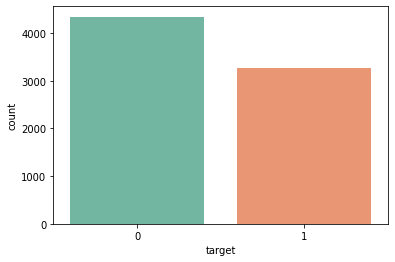

In [166]:
sns.countplot(data['target'],palette ='Set2')
plt.ylabel=('count')
plt.xlabel=('sentiment')
plt.show()

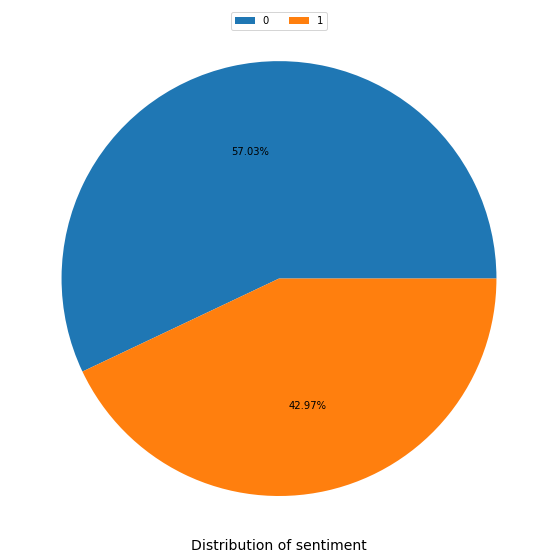

In [167]:
plt.figure(figsize = (10, 10))
label=[0,1]
plt.pie(data['target'].value_counts(), autopct='%0.2f%%')
plt.legend(label, ncol=6, loc=9)
plt.title('Distribution of sentiment', size=14, y=-0.01)
plt.show()


# Data Preprocessing

In [168]:
data['sentiment']=data['target']

In [169]:
data['sentiment'].value_counts()

0    4342
1    3271
Name: sentiment, dtype: int64

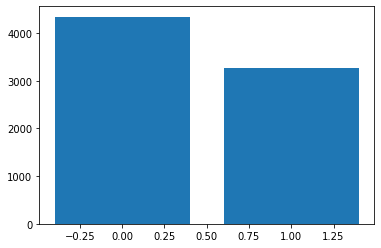

In [170]:
counts=data['sentiment'].value_counts()
plt.bar(counts.index, counts.values)
plt.show()

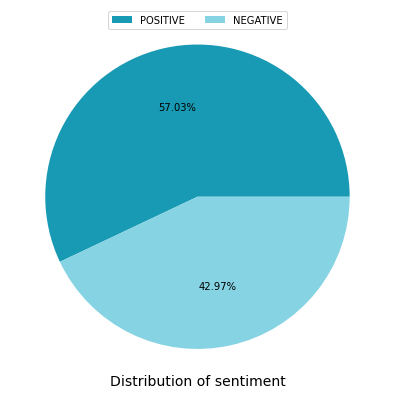

In [171]:
plt.figure(figsize = (7, 7))

labels = ['POSITIVE', 'NEGATIVE']
colors = ['#189AB4', '#86D3E3']
plt.pie(data['sentiment'].value_counts(), autopct='%0.2f%%',colors=colors)

plt.title('Distribution of sentiment', size=14, y=-0.01)
plt.legend(labels, ncol=3, loc=9)
plt.show()

In [172]:
words = pd.Series(' '.join(data['text']).split())
words

0                            Our
1                          Deeds
2                            are
3                            the
4                         Reason
                   ...          
113456                  Wildfire
113457                         -
113458                       ABC
113459                      News
113460    http://t.co/YmY4rSkQ3d
Length: 113461, dtype: object

In [173]:
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

In [174]:
stopword_list = stopwords.words('english')
suitable_stopwords=[]
l =["n'",'nor','no','not']
for i in stopword_list:
    if not any(words in i for words in l):
        suitable_stopwords.append(i)
print(stopword_list)
print(suitable_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [175]:
suitable_stopwords=['i',"come","feel","police","day","two","today","let", 'me', 'my',"building","car", 'myself',"one","think","would", 'we',"news","see","via","say","people", 'our', 'ours', 'ourselves', 'you','' "you're", "you've", "you'll","http","co","new","amp", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who',"go","know", 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should','play','playing','tablet','use','get','kindel','read','book','device','year','time','want', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y']
replace_list=['ain', 'aren', 'couldn', 'didn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'mightn', 'mustn', 'needn',
              'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn',"n't","n'","neg","fire","flood","storm","death","suicide","bomber","kill","bomb","burn","riot","hate"]
pos_list=["love","like","happy","sweet","good","lovely","nice"]
safe=suitable_stopwords+replace_list
safe2=suitable_stopwords+pos_list

In [176]:
def cleanstr(text):
    text=text.lower()
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub(' \d+', ' ', text)
    text=re.sub(r"http\S+", "", text)
    return text

In [177]:
def remove_stopwords(stmt):
    filtered_sentence = []
    stmt=stmt.lower()
    words = word_tokenize(stmt)
    
    for w in words:
        if w not in suitable_stopwords:
            if w not in replace_list :
                filtered_sentence.append(w)
            else:
                if w not in pos_list:
                    filtered_sentence.append(w)
    return " ".join(filtered_sentence)

In [178]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [179]:
def lemmatize(text):
    wl = WordNetLemmatizer()
    lemmatized_sentence = []
    # Tokenize the sentence
    words = word_tokenize(text)
    word_pos_tags = nltk.pos_tag(words)
    for idx, tag in enumerate(word_pos_tags):
        lemmatized_sentence.append(wl.lemmatize(tag[0], get_wordnet_pos(tag[1])))

    return " ".join(lemmatized_sentence)

In [180]:
data['text']=data['text'].apply(cleanstr)
data['text']=data['text'].apply(remove_stopwords)
data['text']=data['text'].apply(lemmatize)
data['text'].iloc[0]

'deed reason earthquake may allah forgive u'

# Word Cloud

In [181]:
positive = data[data['sentiment'] == 1]
negative = data[data['sentiment'] == 0]


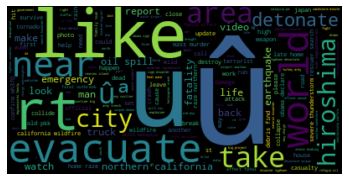

In [182]:
pos = " ".join(d for d in positive.text)
wordcloud2 = WordCloud(stopwords=safe).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

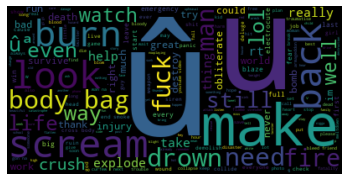

In [183]:
neg = " ".join(d for d in negative.text)
wordcloud3 = WordCloud(stopwords=safe2).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

In [184]:
index = data.index
data['random_number'] = np.random.randn(len(index))
train = data[data['random_number'] <= 0.8]
test = data[data['random_number'] > 0.8]

In [185]:
#Machine learning models 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


In [186]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score

In [187]:
tfidf = TfidfVectorizer()
train_matrix = tfidf.fit_transform(train['text'])
test_matrix = tfidf.transform(test['text'])

In [188]:
X_train = train_matrix
X_test = test_matrix
Y_train = train['sentiment']
Y_test = test['sentiment']

In [189]:
svm =SVC()
svm.fit(X_train, Y_train)
pred_y= svm.predict(X_test)
acc_svm= round(svm.score(X_train, Y_train)*100,2)
acc_svm

97.52

In [190]:
#K-nearest neighbours (KNN)
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
pred_y = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.45

In [191]:
#Logistic Regression
lr=LogisticRegression()
lr.fit(X_train,Y_train)
pred_y=lr.predict(X_test)
acc_lr=round(lr.score(X_train,Y_train)*100,2)
acc_lr

89.32

In [192]:
#Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
pred_y = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

98.72

In [193]:
#Random forest
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

99.65

In [194]:
#Decision tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

99.65

In [195]:
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
                                 'Random Forest', 'Linear SVC', 'Decision Tree'],
                       'Score': [acc_svm, acc_knn, acc_lr, acc_random_forest, acc_linear_svc, acc_decision_tree]})

models.sort_values(by = 'Score', ascending = False, ignore_index = True)

,Model,Score
0,Random Forest,99.65
1,Decision Tree,99.65
2,Linear SVC,98.72
3,Support Vector Machines,97.52
4,Logistic Regression,89.32
5,KNN,83.45


In [196]:
classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(SVC())
classifiers.append(KNeighborsClassifier(n_neighbors = 5))
classifiers.append(LinearSVC())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())

len(classifiers)

6

In [197]:
cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, Y_train, scoring = 'accuracy', cv = 6))

In [198]:
cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [199]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm': ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Linear SVC', 'Decision Tree', 'Random Forest']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.699568,0.047921,Logistic Regression
1,0.690927,0.045696,Support Vector Machines
2,0.690927,0.040347,Linear SVC
3,0.667165,0.035364,KNN
4,0.662014,0.054316,Random Forest
5,0.612662,0.036327,Decision Tree


C:\Users\91630\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: 'str' object is not callable

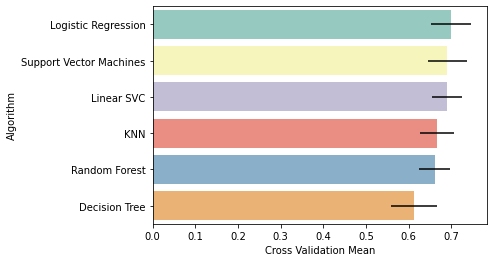

In [200]:
sns.barplot('Cross Validation Mean', 'Algorithm', data = cv_res, order = cv_res.sort_values(by = 'Cross Validation Mean', ascending = False)['Algorithm'], palette = 'Set3', **{'xerr': cv_std})
plt.ylabel('Algorithm')
plt.title('Cross Validation Scores')

In [201]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 5 , stop = 15, num = 10)] # returns 10 numbers 

max_features = ['auto', 'log2']

max_depth = [int(x) for x in np.linspace(5, 10, num = 2)] 

max_depth.append(None)

bootstrap = [True, False]

r_grid = {'n_estimators': n_estimators,

               'max_features': max_features,

               'max_depth': max_depth,

               'bootstrap': bootstrap}

print(r_grid)

{'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15], 'max_features': ['auto', 'log2'], 'max_depth': [5, 10, None], 'bootstrap': [True, False]}


In [202]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(Y_test, Y_pred))
print('\n')
print(classification_report(Y_test, Y_pred))
lr.score(X_train, Y_train)

[[704 235]
 [207 449]]


              precision    recall  f1-score   support

           0       0.77      0.75      0.76       939
           1       0.66      0.68      0.67       656

    accuracy                           0.72      1595
   macro avg       0.71      0.72      0.72      1595
weighted avg       0.72      0.72      0.72      1595



0.8931538717181788

**the overall accuracy is 89.00%**

# Testing With personal review.

In [203]:
text="flood killed people"

text=cleanstr(text)
text=remove_stopwords(text)
text=(lemmatize(text))
print(text)

flood kill


In [204]:
vec=tfidf.transform([text])
pre=lr.predict(vec)
if pre==1:
    print("Negative")
else:
    print("Positive")


Negative


In [205]:
%run ./Untitled1.ipynb

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'display_text_range', 'entities', 'favorite', 'favorite_count', 'favorited', 'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'metadata', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweeted_status', 'retweets', 'source', 'source_url', 'truncated', 'user']
RT @SRSO_Official: #Mosquito control drive of SRSO against Emerging Cases of #malaria &amp; #dangue fever, thr

In [206]:
tweet['tweets']=tweet['tweets'].apply(cleanstr)
tweet['tweets']=tweet['tweets'].apply(remove_stopwords)
tweet['tweets']=tweet['tweets'].apply(lemmatize)
tweet['tweets'].iloc[0]

'rt berlinergazette decolonization anyone reparation repair life aftermath disaster text nishat awan en t…'

In [207]:
tweetss = tfidf.transform(tweet['tweets'])


In [208]:
pred=lr.predict(tweetss)

In [209]:
pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

# Bigrams
